In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"

In [2]:
df = pd.read_csv('comrades_2025_results.csv')

In [3]:
# return values in df Time columne where the value does not contain a number
# df[~df['Time'].str.contains(r'\d')]['Time'].unique()

In [4]:
# convert the Pos, Cat Pos, and Gen Pos columns to Int32
df['Pos'] = df['Pos'].astype('Int32')
df['Cat Pos'] = df['Cat Pos'].astype('Int32')
df['Gen Pos'] = df['Gen Pos'].astype('Int32')

In [ ]:
df['Pos'].rank(pct=True, ascending=True)

0           1
1           2
2           3
3           4
4           5
         ... 
22681    <NA>
22682    <NA>
22683    <NA>
22684    <NA>
22685    <NA>
Name: Pos, Length: 22686, dtype: Int32

In [5]:
# convert the values of DNF, Not started, UOF, Started in the time column to their own boolean columns
df['DNF'] = df['Time'].str.contains('DNF')
df['Not started'] = df['Time'].str.contains('Not started')
df['UOF'] = df['Time'].str.contains('UOF')
df['Started'] = df['Time'].str.contains('Started') 
df['DNS'] = df['Time'].str.contains('DNS') 

# remove the DNF, Not started, UOF, and Started values from the Time column
df['Time'] = df['Time'].str.replace('DNF', '', regex=False)
df['Time'] = df['Time'].str.replace('Not started', '', regex=False)
df['Time'] = df['Time'].str.replace('UOF', '', regex=False)
df['Time'] = df['Time'].str.replace('Started', '', regex=False)
df['Time'] = df['Time'].str.replace('DNS', '', regex=False)
# convert the Time column to a timedelta
df['Time'] = pd.to_timedelta(df['Time'], errors='coerce')

In [6]:
# remove the DNF, Not started, UOF, and Started values from the Time column
df['Net Time'] = df['Net Time'].str.replace('DNF', '', regex=False)
df['Net Time'] = df['Net Time'].str.replace('Not started', '', regex=False)
df['Net Time'] = df['Net Time'].str.replace('UOF', '', regex=False)
df['Net Time'] = df['Net Time'].str.replace('Started', '', regex=False)
df['Net Time'] = df['Net Time'].str.replace('DNS', '', regex=False)
# convert the Time column to a timedelta
df['Net Time'] = pd.to_timedelta(df['Net Time'], errors='coerce')

<Axes: xlabel='count', ylabel='Country'>

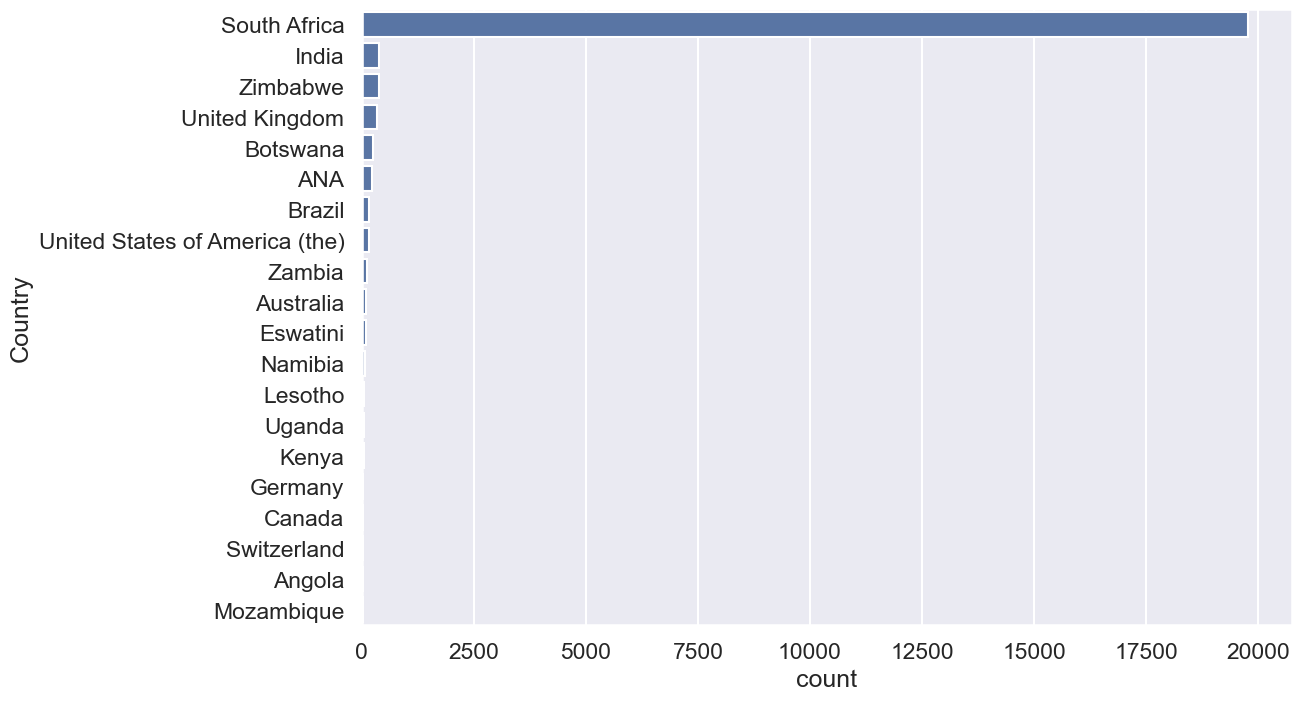

In [13]:
sns.set_theme(style="darkgrid", context="talk")
plt.figure(figsize=(12, 8))
sns.countplot(df, y='Country', order=df['Country'].value_counts().index[:20])

In [14]:
df.head()

,Pos,Race No,Wave,Flag,Name,Time,Net Time,Category,Cat Pos,Gender,Gen Pos,Club,Country,DNF,Not started,UOF,Started,DNS
0,1,28951,A - Group 1,ZA,Tete DIJANA,0 days 05:25:28,0 days 05:25:25,Senior,1,Male,1,NEDBANK RUNNING CLUB GN,South Africa,False,False,False,False,False
1,2,55335,A - Group 1,NL,Piet WIERSMA,0 days 05:25:33,0 days 05:25:30,Senior,2,Male,2,NEDBANK INTERNATIONAL,Netherlands,False,False,False,False,False
2,3,31470,A - Group 1,XX,Nikolai VOLKOV,0 days 05:29:42,0 days 05:29:36,Senior,3,Male,3,MAXED ELITE INTERNATIONAL,ANA,False,False,False,False,False
3,4,17472,A - Group 1,ZA,Edward MOTHIBI,0 days 05:31:41,0 days 05:31:38,40-49,1,Male,4,NEDBANK RUNNING CLUB GN,South Africa,False,False,False,False,False
4,5,28773,A - Group 1,ZA,Joseph MANYEDI,0 days 05:32:09,0 days 05:32:04,40-49,2,Male,5,MAXED ELITE KZN,South Africa,False,False,False,False,False


In [38]:
#convert the 'Time' column to seconds for easier calculations
df['Time (seconds)'] = df['Time'].dt.total_seconds()
#convert the 'Time' column to minutes
df['Time (minutes)'] = df['Time (seconds)'] / 60

/var/folders/5_/tx_4gtn53wz0zst5cztrq6dr0000gn/T/ipykernel_84590/555477507.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




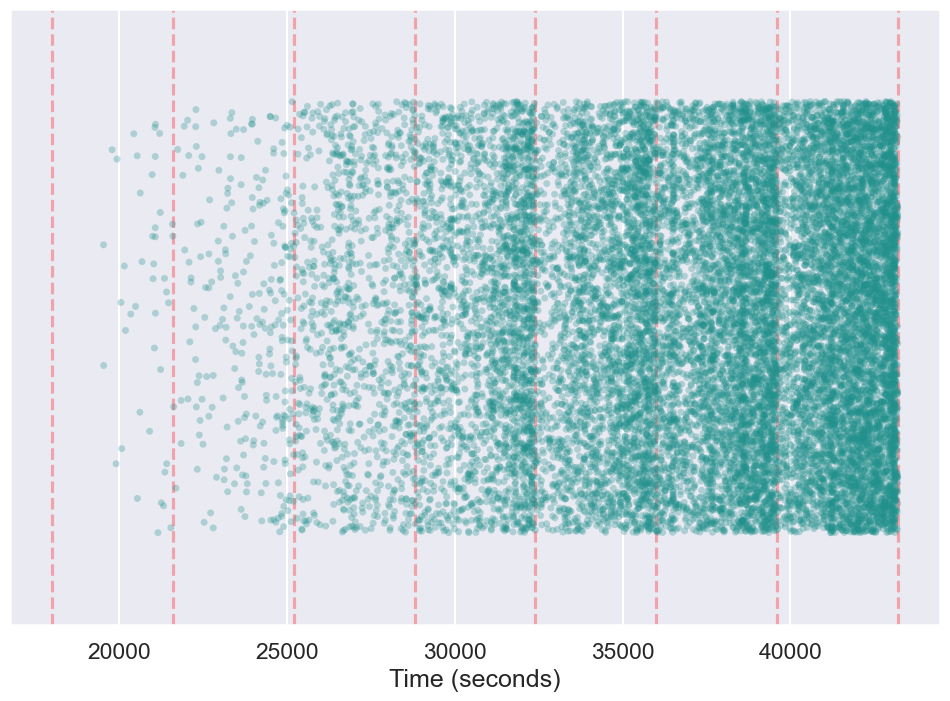

In [52]:
plt.figure(figsize=(12, 8))
sns.stripplot(data=df, x='Time (seconds)', orient='h', palette='viridis', jitter=0.35, alpha=0.3)
for i in range(5, 13):
    plt.axvline(x=i * 60 * 60, color='red', linestyle='--', alpha=0.3, label=f'{i} hours')

<Axes: xlabel='Time (seconds)', ylabel='Name'>

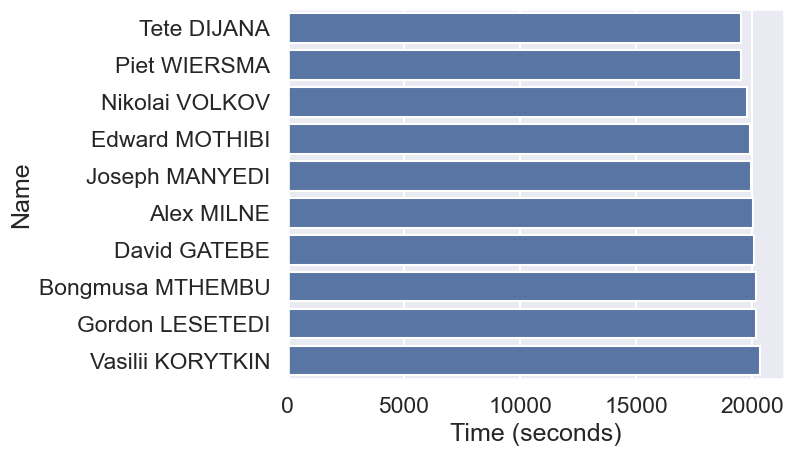

In [26]:
sns.barplot(data=df.head(10), y='Name', x='Time (seconds)')

In [ ]:
sns.set_theme(style="darkgrid", context="talk")
plt.figure(figsize=(12, 8))
sns.countplot(df, y='Country', order=df['Country'].value_counts().index[:20])